# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

### Solution

The code was modified to print through a function _ConfOld_ the configuration at the last but one step of the simulation in a file <font face="Courier">old.final</font>. This file (together with <font face="Courier">config.final</font>) can be copied in <font face="Courier">old.0</font> (and <font face="Courier">config.0</font>) to restart the simulation.

The file <font face="Courier">input.dat</font> must be modified to contain two more boolean-like variables (either $0$ or $1$) in the first two lines. The function _Input_ checks the value of the first variable (*old_config*) and if it is $0$ it only reads the file <font face="Courier">config.0</font> and proceeds to initialize the simulation with random starting velocities as before. If the value is $1$ instead, it also reads the old configuration from <font face="Courier">old.0</font>. Then if the second variable (*rescale_vel*) is $1$ the starting velocities are rescaled to match the desired temperature and the old configuration is corrected accordingly.

The following graphs report the measures of the 5 thermodynamic properties (the calculation of the pressure has been added) over 10 consecutive simulations (restarted reading <font face="Courier">old.0</font> and rescaling velocities) of $4\times10^3$ steps each with the input parameters for the Argon solid, liquid and gas phases. They show that thermodynamic equilibrium is reached after approximately 4 simulations, when the target temperature $T^*$ is reached. After 10 simulations we can safely assert that there are no more leaps in the measured quantities at the beginning of a new simulation in all the three cases. Actually some leaps can still be seen in the total energy after the 4-th simulation, but they are much smaller than the previous ones. All quantities are in Lennard-Jones units.

#### Solid phase

$T^*=0.8$

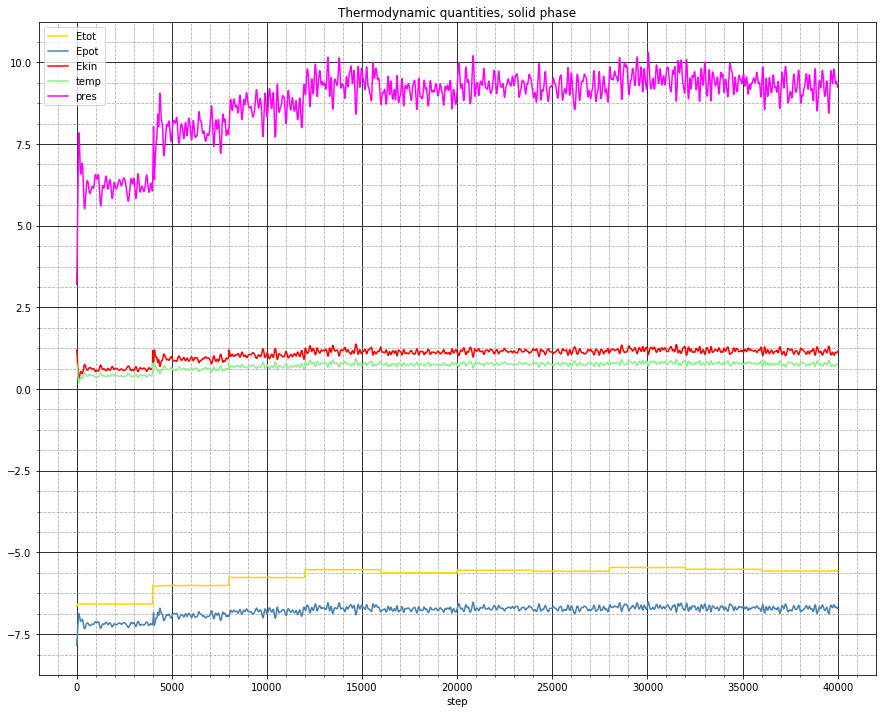

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

etot=np.loadtxt("measures/output_etot_10_solid.dat")
epot=np.loadtxt("measures/output_epot_10_solid.dat")
ekin=np.loadtxt("measures/output_ekin_10_solid.dat")
temp=np.loadtxt("measures/output_temp_10_solid.dat")
pres=np.loadtxt("measures/output_pres_10_solid.dat")
step=[10*x for x in range(len(etot))]

plt.figure(figsize=(15, 12))
plt.plot(step, etot, label='Etot', color='gold')
plt.plot(step, epot, label='Epot', color='steelblue')
plt.plot(step, ekin, label='Ekin', color='r')
plt.plot(step, temp, label='temp', color='lightgreen')
plt.plot(step, pres, label='pres', color='magenta')
plt.title('Thermodynamic quantities, solid phase')
plt.xlabel('step')
plt.grid(True, which='major', color='k', linestyle='-')
plt.grid(True, which='minor', linestyle='--')
plt.minorticks_on()
plt.legend()
plt.show()

#### Liquid phase

$T^*=1.1$

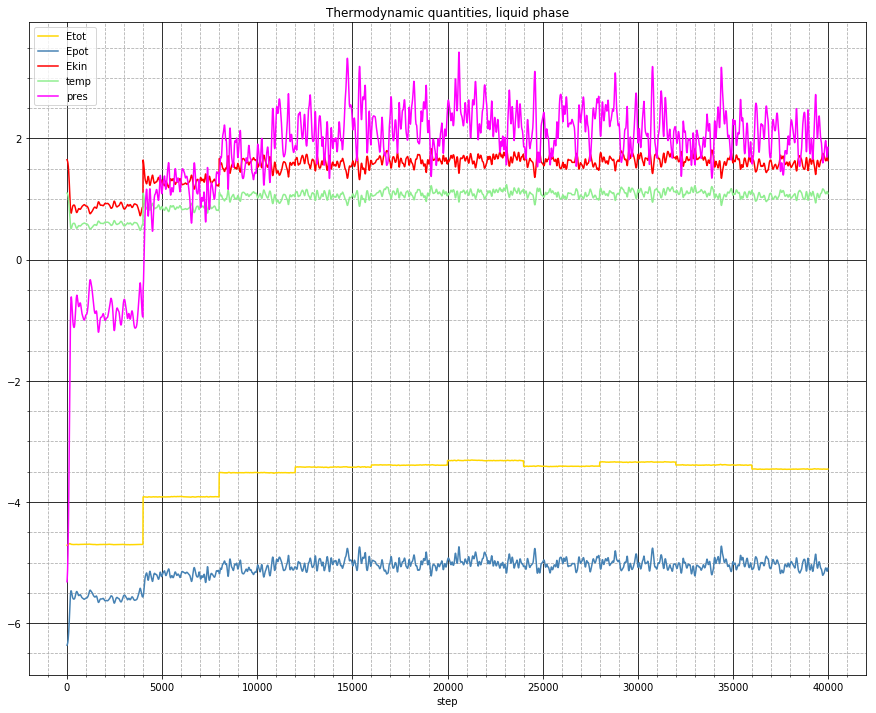

In [2]:
etot=np.loadtxt("measures/output_etot_10_liquid.dat")
epot=np.loadtxt("measures/output_epot_10_liquid.dat")
ekin=np.loadtxt("measures/output_ekin_10_liquid.dat")
temp=np.loadtxt("measures/output_temp_10_liquid.dat")
pres=np.loadtxt("measures/output_pres_10_liquid.dat")
step=[10*x for x in range(len(etot))]

plt.figure(figsize=(15, 12))
plt.plot(step, etot, label='Etot', color='gold')
plt.plot(step, epot, label='Epot', color='steelblue')
plt.plot(step, ekin, label='Ekin', color='r')
plt.plot(step, temp, label='temp', color='lightgreen')
plt.plot(step, pres, label='pres', color='magenta')
plt.title('Thermodynamic quantities, liquid phase')
plt.xlabel('step')
plt.grid(True, which='major', color='k', linestyle='-')
plt.grid(True, which='minor', linestyle='--')
plt.minorticks_on()
plt.legend()
plt.show()

#### Gas phase

$T^*=1.2$

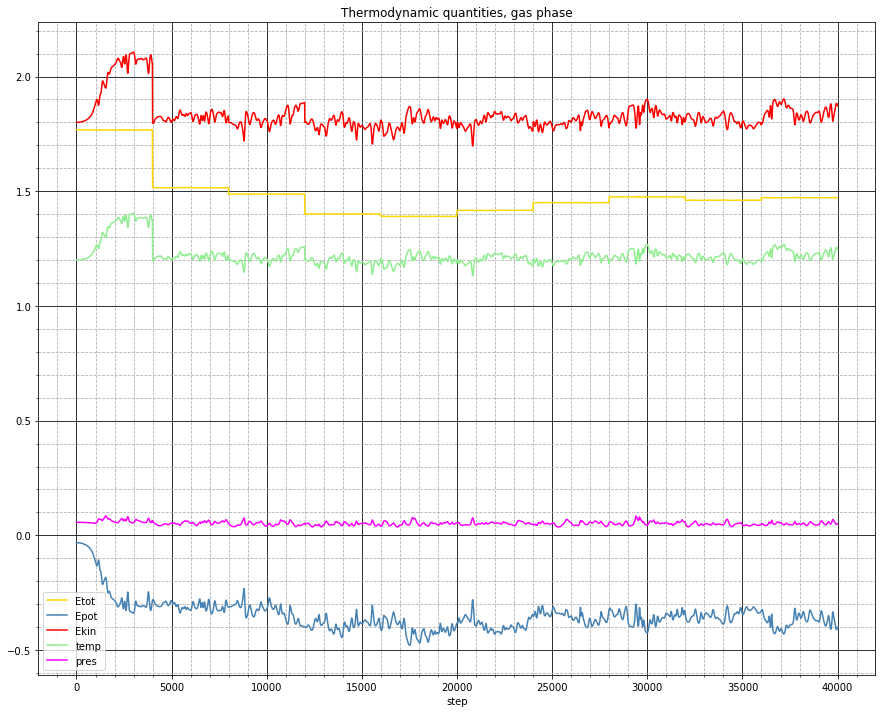

In [3]:
etot=np.loadtxt("measures/output_etot_10_gas.dat")
epot=np.loadtxt("measures/output_epot_10_gas.dat")
ekin=np.loadtxt("measures/output_ekin_10_gas.dat")
temp=np.loadtxt("measures/output_temp_10_gas.dat")
pres=np.loadtxt("measures/output_pres_10_gas.dat")
step=[10*x for x in range(len(etot))]

plt.figure(figsize=(15, 12))
plt.plot(step, etot, label='Etot', color='gold')
plt.plot(step, epot, label='Epot', color='steelblue')
plt.plot(step, ekin, label='Ekin', color='r')
plt.plot(step, temp, label='temp', color='lightgreen')
plt.plot(step, pres, label='pres', color='magenta')
plt.title('Thermodynamic quantities, gas phase')
plt.xlabel('step')
plt.grid(True, which='major', color='k', linestyle='-')
plt.grid(True, which='minor', linestyle='--')
plt.minorticks_on()
plt.legend()
plt.show()

### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

### Solution

All output files are organized in sub-directories.

While the function _Measure_ performs a measure of the 5 properties (namely total energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, temperature, $T$, and pressure, $p$) every $10$ Verlet moves and writes them in the output files <font face="Courier">output_epot.dat, output_epot.dat, output_ekin.dat, output_temp.dat, output_pres.dat</font></span>, the function _MeasureEachStep_ measures the same quantities at each step of the integration and accumulates these instant estimations into vectors that are later used to compute blocking averages, where the total number of steps _nstep_, read from the input file, is divided into $N=100$ blocks. The code works as follows:

1. Initialize all the variables and setting the starting (and the old) configuration.
2. Start looping over blocks.
3. For each block perform _nstep/nblocks_ Verlet moves calling _MeasureEachStep_ every time.
4. Calculate block average up to that block and its uncertainty.
5. When the loop is over write the last configuration in <font face="Courier"> config.final </font></span> and the last but one in <font face="Courier"> old.final </font></span> and the blcoking averages in <font face="Courier">ave_etot.out, ave_epot.out, ave_ekin.out, ave_temp.out, ave_pres.out.dat</font></span>.

### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

### Solution

For all the three phases $5\times10^4$ steps simulations have been run after equilibrating the system with 10 shorter simulations ($4\times10^3$ steps), restarting every time from the previous final configuration. All quantities are reported in the graphs below in SI units (the conversion is made by Python).

Some general observations can be made. Like in the previous plots the measures of the total energy are almost identical throughout the whole simulation. Indeed its average value has only small variations, compared to those of the potential and kinetic energy, when increasing the number of blocks. This reflects the fact that we are operating in the microcanonical ensemble, i.e. with fixed internal energy, while the other thermodynamic properties, like temperature and pressure, oscillate around their average values (this can be seen especially in the pictures above). As a consequence the variations of the potential and the kinetic energy are almost specular, so that their sum is constant. Moreover, since the measures of the total energy are only slightly different from each other, the STD of the mean is very low, $\sim 10^{-6} eV$ for the solid and liquid phase, $\sim 10^{-7} eV$ for the gas phase, while the error of the potential and kinetic energy is one order of magnitude higher (2 for the gas), $\sim 10^{-5} eV$.

#### Solid phase

The temperature is slightly below the target value $T=96K$. The total energy per particle is negative, which indicates a stable phase where atoms are bound one to another.

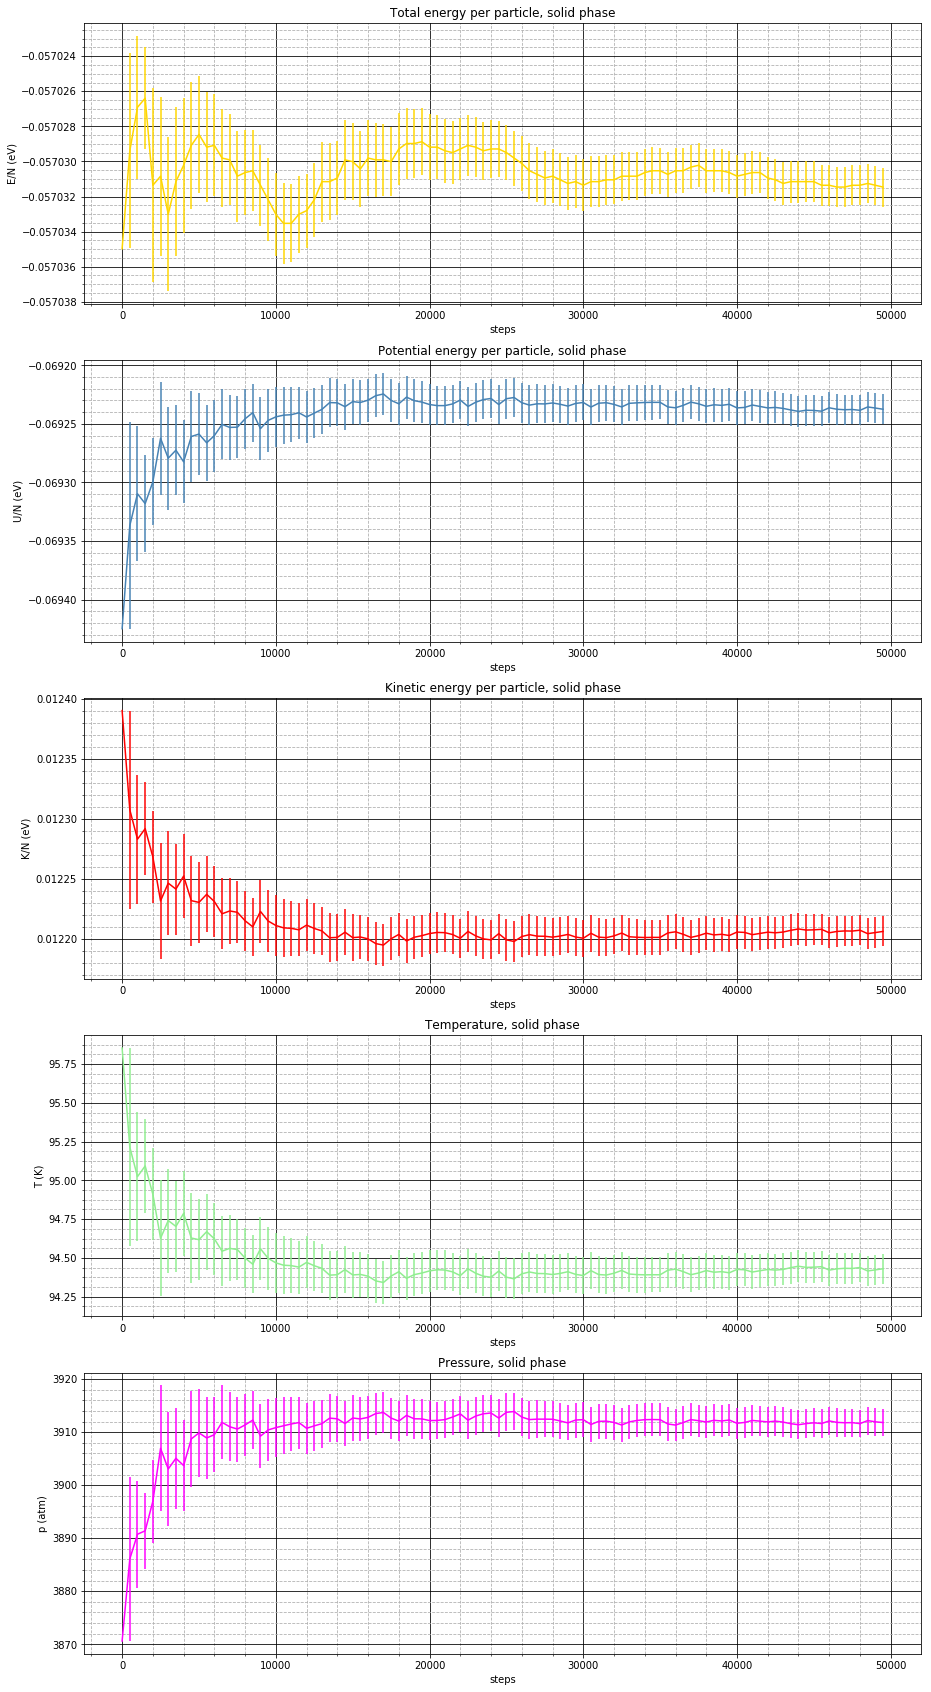

In [5]:
ave_etot=np.loadtxt("averages/ave_etot_solid.out")
ave_epot=np.loadtxt("averages/ave_epot_solid.out")
ave_ekin=np.loadtxt("averages/ave_ekin_solid.out")
ave_temp=np.loadtxt("averages/ave_temp_solid.out")
ave_pres=np.loadtxt("averages/ave_pres_solid.out")
x=[500*block for block in range(len(ave_etot[:,0]))]

sigma=0.34e-9
T0=120
K=1.380649e-23
eV=1.60218e-19
eps=T0*K/eV #Here using eV
m=39.948*1.66054e-27
p0=eps*eV/((sigma**3)*101325) #Here using atm

fig, ax = plt.subplots(5,1, figsize=(15, 30))
ax[0].errorbar(x,eps*ave_etot[:,0],yerr=eps*ave_etot[:,1], color='gold')
ax[0].set_title('Total energy per particle, solid phase');
plt.setp(ax[0], ylabel='E/N (eV)')
ax[1].errorbar(x,eps*ave_epot[:,0],yerr=eps*ave_epot[:,1], color='steelblue')
ax[1].set_title('Potential energy per particle, solid phase');
plt.setp(ax[1], ylabel='U/N (eV)')
ax[2].errorbar(x,eps*ave_ekin[:,0],yerr=eps*ave_ekin[:,1], color='r')
ax[2].set_title('Kinetic energy per particle, solid phase');
plt.setp(ax[2], ylabel='K/N (eV)')
ax[3].errorbar(x,T0*ave_temp[:,0],yerr=T0*ave_temp[:,1], color='lightgreen')
ax[3].set_title('Temperature, solid phase');
plt.setp(ax[3], ylabel='T (K)')
ax[4].errorbar(x,p0*ave_pres[:,0],yerr=p0*ave_pres[:,1], color='magenta')
ax[4].set_title('Pressure, solid phase');
plt.setp(ax[4], ylabel='p (atm)')
plt.setp(ax[:], xlabel='steps')

for row in ax:
    row.grid(True, which='major', color='k', linestyle='-')
    row.grid(True, which='minor', linestyle='--')
    row.minorticks_on()

#### Liquid phase

The temperature is slightly below the target value $T=132K$. The total energy per particle is higher than the one of the solid phase but still negative, which means atoms are more weakly bound. The pressure is lower than in the solid phase.

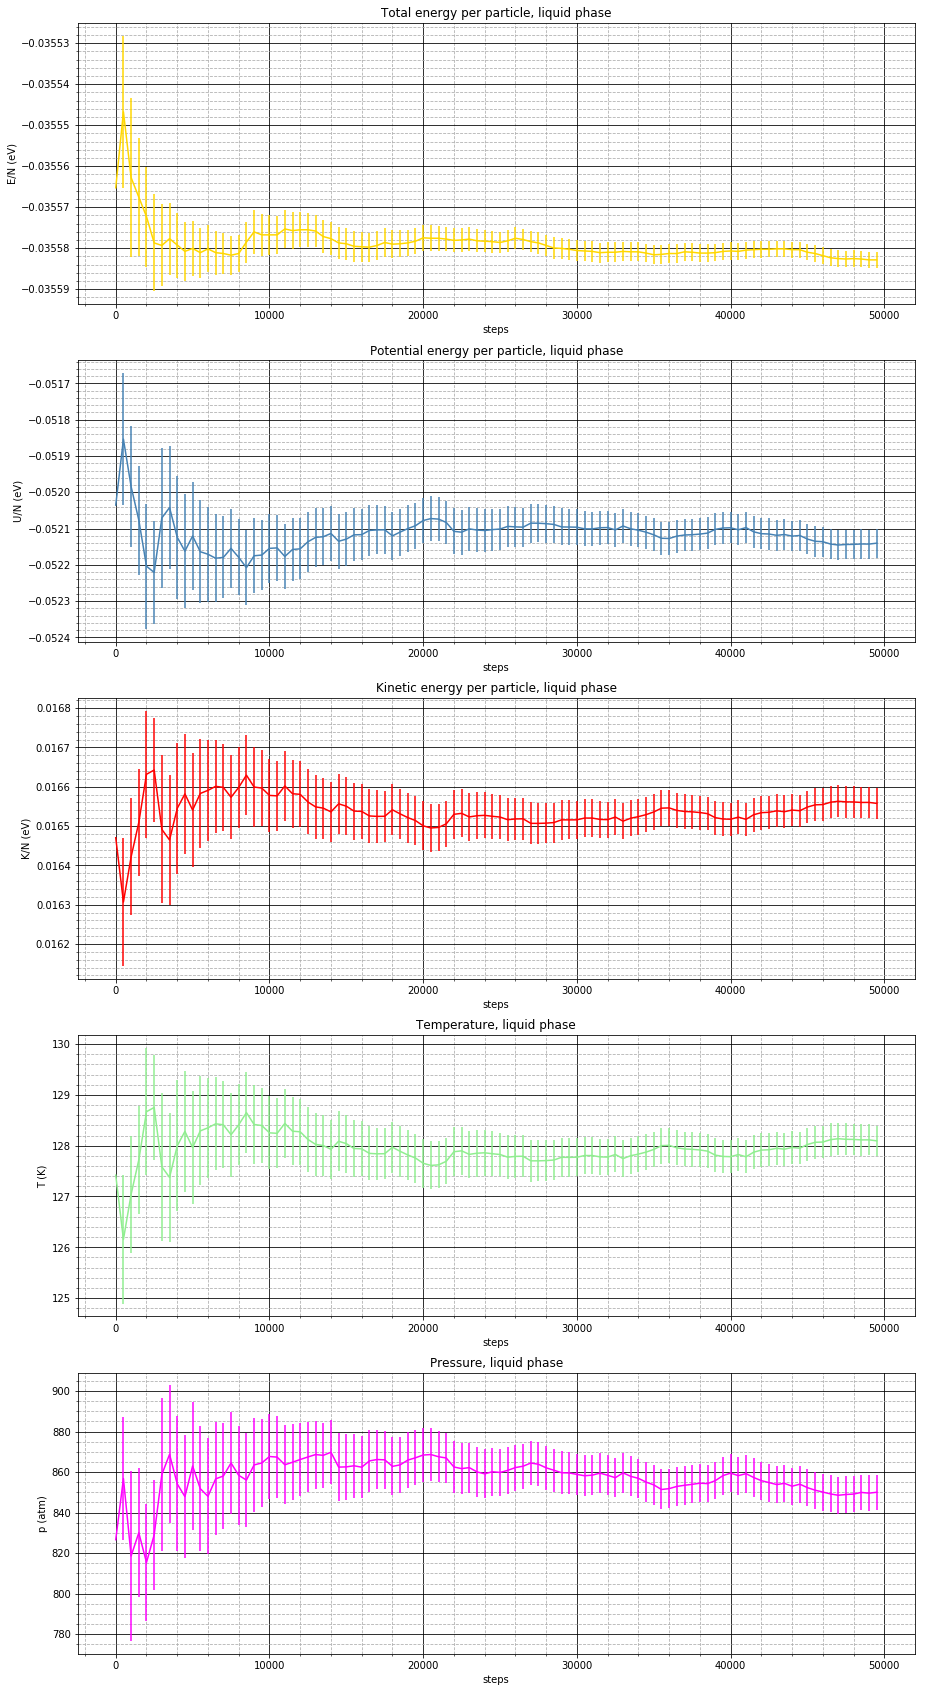

In [6]:
ave_etot=np.loadtxt("averages/ave_etot_liquid.out")
ave_epot=np.loadtxt("averages/ave_epot_liquid.out")
ave_ekin=np.loadtxt("averages/ave_ekin_liquid.out")
ave_temp=np.loadtxt("averages/ave_temp_liquid.out")
ave_pres=np.loadtxt("averages/ave_pres_liquid.out")
x=[500*block for block in range(len(ave_etot[:,0]))]

fig, ax = plt.subplots(5,1, figsize=(15, 30))
ax[0].errorbar(x,eps*ave_etot[:,0],yerr=eps*ave_etot[:,1], color='gold')
ax[0].set_title('Total energy per particle, liquid phase');
plt.setp(ax[0], ylabel='E/N (eV)')
ax[1].errorbar(x,eps*ave_epot[:,0],yerr=eps*ave_epot[:,1], color='steelblue')
ax[1].set_title('Potential energy per particle, liquid phase');
plt.setp(ax[1], ylabel='U/N (eV)')
ax[2].errorbar(x,eps*ave_ekin[:,0],yerr=eps*ave_ekin[:,1], color='r')
ax[2].set_title('Kinetic energy per particle, liquid phase');
plt.setp(ax[2], ylabel='K/N (eV)')
ax[3].errorbar(x,T0*ave_temp[:,0],yerr=T0*ave_temp[:,1], color='lightgreen')
ax[3].set_title('Temperature, liquid phase');
plt.setp(ax[3], ylabel='T (K)')
ax[4].errorbar(x,p0*ave_pres[:,0],yerr=p0*ave_pres[:,1], color='magenta')
ax[4].set_title('Pressure, liquid phase');
plt.setp(ax[4], ylabel='p (atm)')
plt.setp(ax[:], xlabel='steps')

for row in ax:
    row.grid(True, which='major', color='k', linestyle='-')
    row.grid(True, which='minor', linestyle='--')
    row.minorticks_on()

#### Gas phase

The temperature is in this case very close to the target value $T=144K$. The total energy per particle is positive, reflecting the fact that atoms are not bound in the gas phase. As one could expect, this phase has a much lower pressure then the previous two.

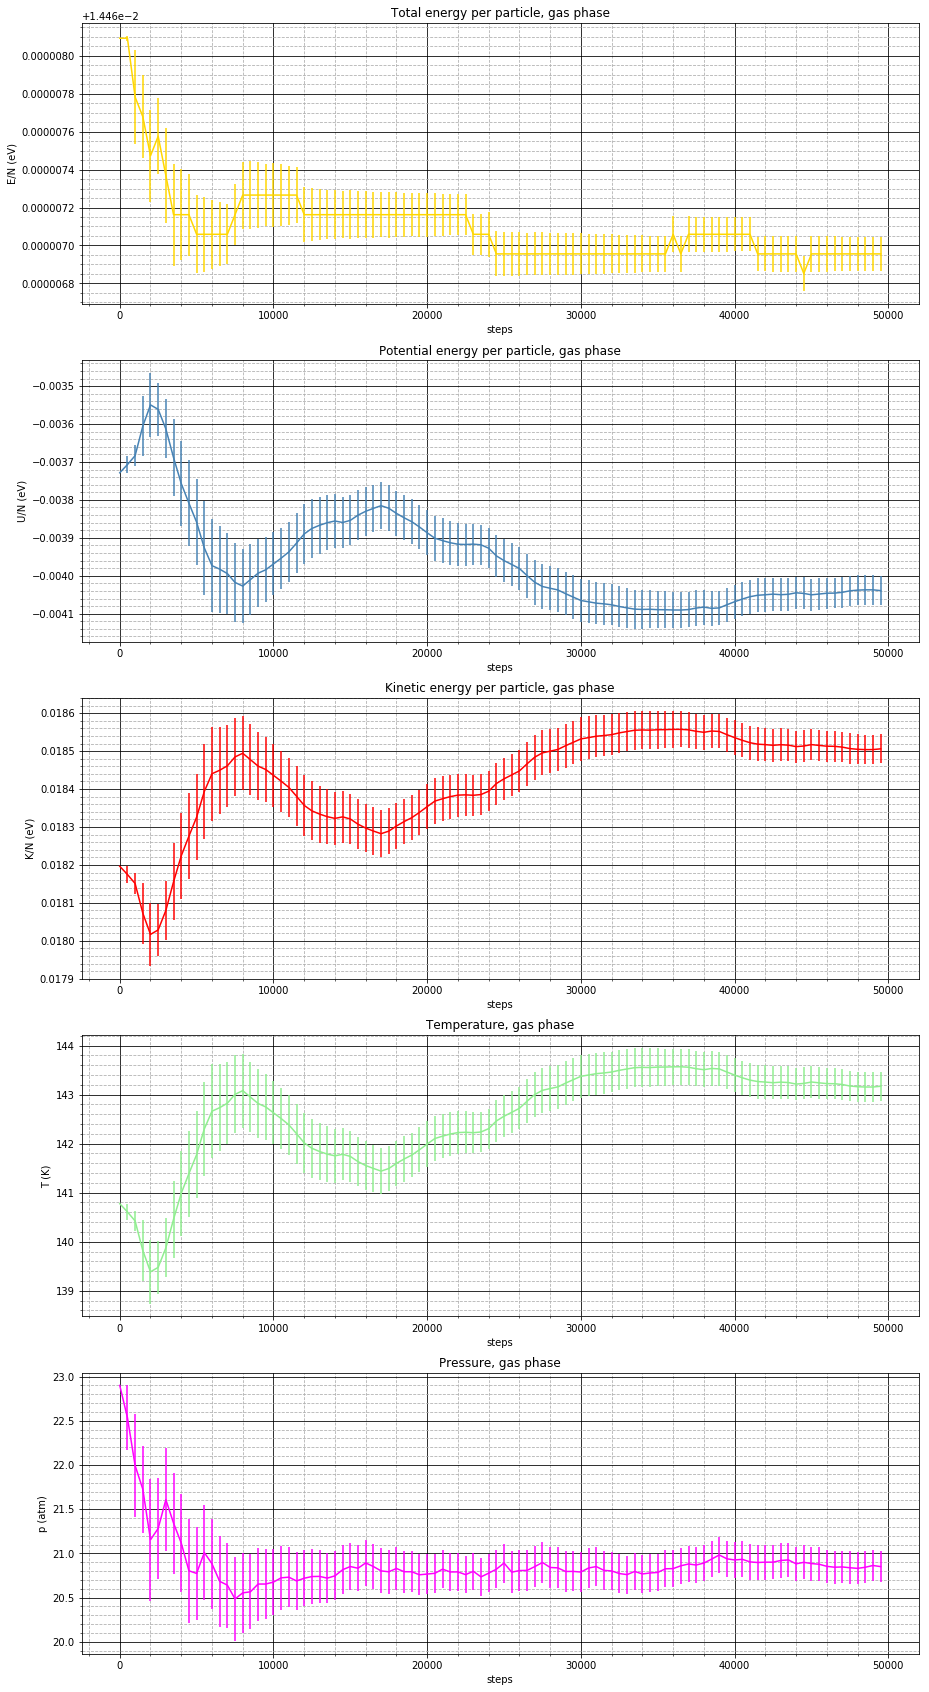

In [7]:
ave_etot=np.loadtxt("averages/ave_etot_gas.out")
ave_epot=np.loadtxt("averages/ave_epot_gas.out")
ave_ekin=np.loadtxt("averages/ave_ekin_gas.out")
ave_temp=np.loadtxt("averages/ave_temp_gas.out")
ave_pres=np.loadtxt("averages/ave_pres_gas.out")
x=[500*block for block in range(len(ave_etot[:,0]))]

fig, ax = plt.subplots(5,1, figsize=(15, 30))
ax[0].errorbar(x,eps*ave_etot[:,0],yerr=eps*ave_etot[:,1], color='gold')
ax[0].set_title('Total energy per particle, gas phase');
plt.setp(ax[0], ylabel='E/N (eV)')
ax[1].errorbar(x,eps*ave_epot[:,0],yerr=eps*ave_epot[:,1], color='steelblue')
ax[1].set_title('Potential energy per particle, gas phase');
plt.setp(ax[1], ylabel='U/N (eV)')
ax[2].errorbar(x,eps*ave_ekin[:,0],yerr=eps*ave_ekin[:,1], color='r')
ax[2].set_title('Kinetic energy per particle, gas phase');
plt.setp(ax[2], ylabel='K/N (eV)')
ax[3].errorbar(x,T0*ave_temp[:,0],yerr=T0*ave_temp[:,1], color='lightgreen')
ax[3].set_title('Temperature, gas phase');
plt.setp(ax[3], ylabel='T (K)')
ax[4].errorbar(x,p0*ave_pres[:,0],yerr=p0*ave_pres[:,1], color='magenta')
ax[4].set_title('Pressure, gas phase');
plt.setp(ax[4], ylabel='p (atm)')
plt.setp(ax[:], xlabel='steps')

for row in ax:
    row.grid(True, which='major', color='k', linestyle='-')
    row.grid(True, which='minor', linestyle='--')
    row.minorticks_on()

### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$